<a href="https://colab.research.google.com/github/anmancuso/TutorialPython/blob/main/Introduzione_a_matplotlib%26fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduzione a Matplotlib
Matplotlib è una libreria per la visualizzazione dei dati in Python. Offre un'ampia gamma di funzionalità per creare grafici e plot di alta qualità. In questo tutorial, esploreremo i principali tipi di plot utilizzando Matplotlib insieme a Pandas e NumPy.

## Importazione delle librerie
Per utilizzare Matplotlib insieme a Pandas e NumPy, è necessario importare le seguenti librerie:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Scatter Plot
Lo scatterplot è un tipo di plot che mostra la distribuzione dei punti in un grafico bidimensionale. È utile per visualizzare la relazione tra due variabili continue.

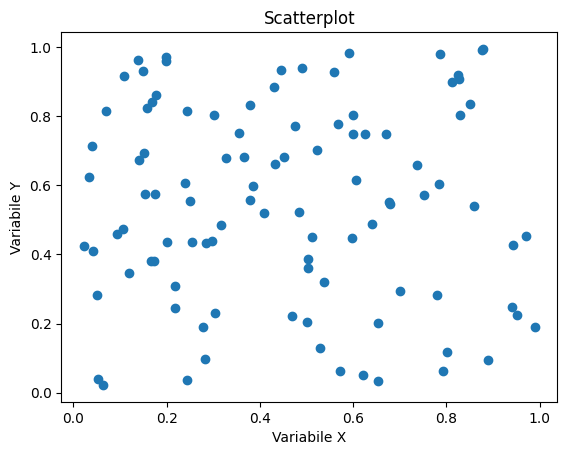

In [2]:
# Creare un DataFrame di esempio
data = pd.DataFrame({'x': np.random.rand(100), 'y': np.random.rand(100)})

# Creare uno scatterplot
plt.scatter(data['x'], data['y'])
plt.xlabel('Variabile X')
plt.ylabel('Variabile Y')
plt.title('Scatterplot')
#plt.grid()
plt.show()

## Line plot
Il lineplot è un tipo di plot che mostra una linea che connette i punti dei dati in un grafico bidimensionale. È utile per visualizzare la tendenza o il cambiamento di una variabile nel tempo.

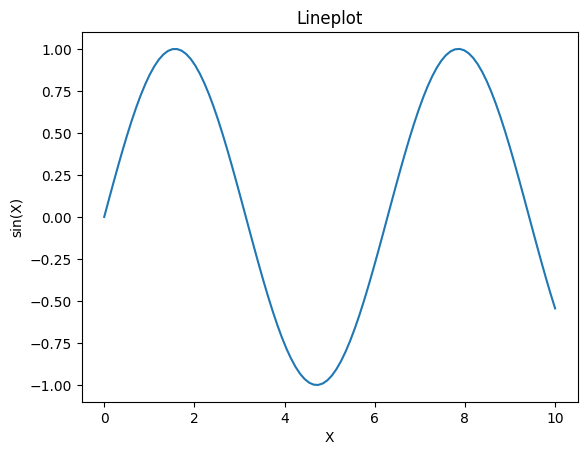

In [3]:
# Creare un array di dati
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Creare un lineplot
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('sin(X)')
plt.title('Lineplot')
plt.show()

## Errorbar
 rappresentare l'incertezza dei dati su un grafico

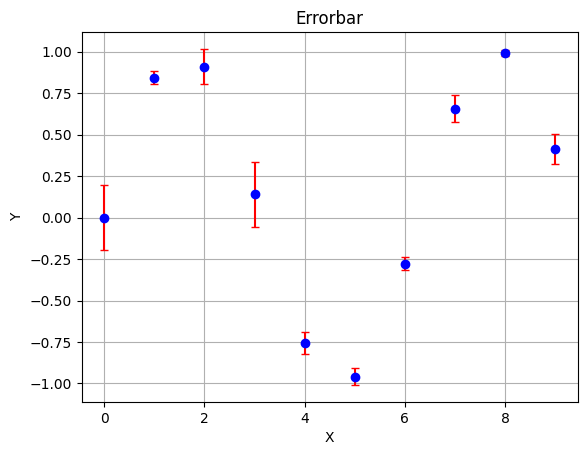

In [4]:
# Dati di esempio
x = np.arange(0, 10, 1)
y = np.sin(x)
error = np.random.rand(len(x)) * 0.2  # Valori di errore casuali

# Creazione del grafico con errori
plt.errorbar(x, y, yerr=error, fmt='o', color='blue', ecolor='red', capsize=3)

# Personalizzazione del grafico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Errorbar')
plt.grid(True)

# Mostra il grafico
plt.show()

## Istogramma
L'istogramma è un tipo di plot che mostra la distribuzione dei dati in un grafico a barre. È utile per visualizzare la frequenza o la densità dei dati in intervalli specifici.

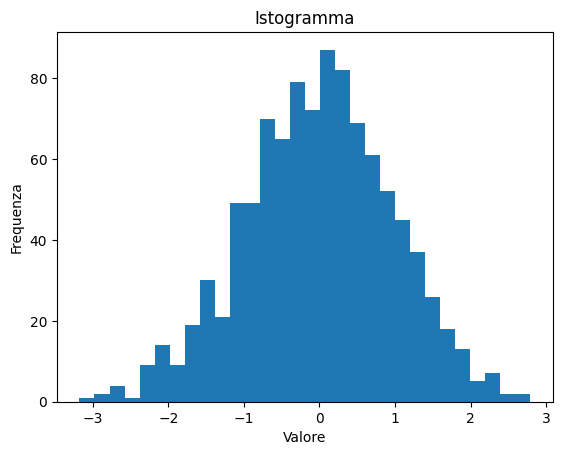

In [5]:
# Generare dati casuali
data = np.random.randn(1000)

# Creare un istogramma
plt.hist(data, bins=30)
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.title('Istogramma')
plt.show()


## Istogramma 2d
L'istogramma2D rappresenta la distribuzione bidimensionale dei dati utilizzando la frequenza dei punti in intervalli specifici.

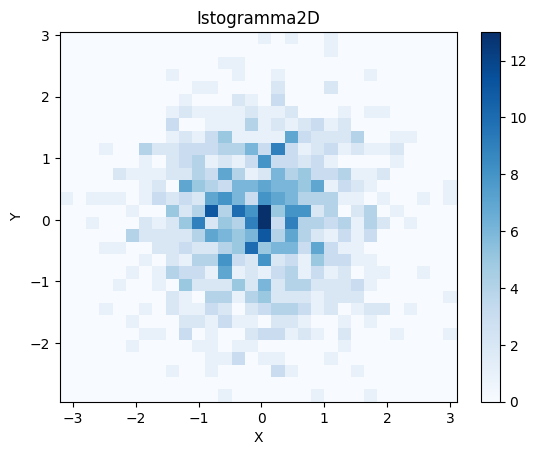

In [6]:
# Generare dati casuali
x = np.random.randn(1000)
y = np.random.randn(1000)

# Creare un istogramma2D
plt.hist2d(x, y, bins=30, cmap='Blues')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Istogramma2D')
plt.show()


# Funzioni di stile dei plot

Matplotlib offre molte funzioni per personalizzare l'estetica dei plot, tra cui colori, stili di linea, dimensioni dei marker, etichette degli assi e altro ancora. Ecco alcuni esempi di utilizzo di alcune funzioni di stile:

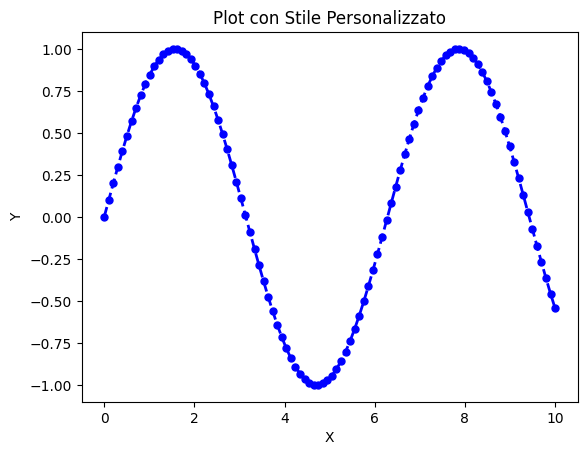

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Dati di esempio
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Creazione del grafico
plt.plot(x, y, color='blue', linewidth=2, linestyle='--', marker='o', markersize=5)

# Personalizzazione del grafico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot con Stile Personalizzato')

# Mostra il grafico
plt.show()

# SCIPY & Fit 
Scipy è una libreria parallela che serve per sfruttare tutte le funzioni relative ai fit, nell'ambito scientifico per lo più.
In questo tutorial vediamo come fittare un istogramma che ci aspettiamo essere gaussiano e un fit lineare di uno scatter plot. 

#Curve Fit per Fittare un Istogramma Gaussiano

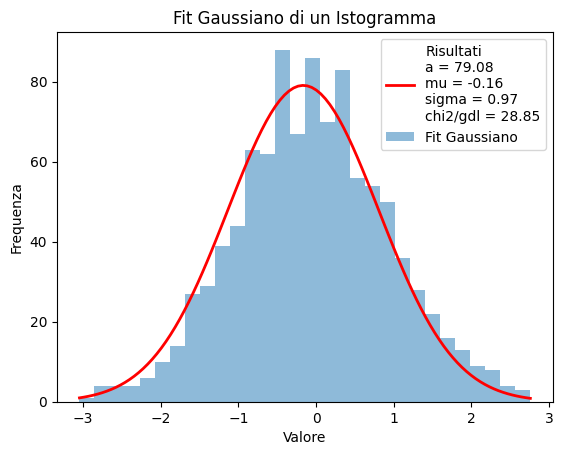

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generazione dei dati di esempio
np.random.seed(0)
data = np.random.randn(1000)

# Calcolo dell'istogramma dei dati
hist, bins = np.histogram(data, bins=30)

# Definizione della funzione gaussiana
def gaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Fittaggio della funzione gaussiana ai dati dell'istogramma
p0 = [100, 0, 1]  # Valori iniziali per i parametri a, mu e sigma
params, _ = curve_fit(gaussian, bins[:-1], hist, p0=p0)

# Creazione del grafico
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge', alpha=0.5, label='Dati')
x = np.linspace(bins[0], bins[-1], 100)
plt.plot(x, gaussian(x, *params), color='red', linewidth=2, label='Fit Gaussiano')

# Informazioni sui parametri e chi2/ndof
param_info = f"a = {params[0]:.2f}\nmu = {params[1]:.2f}\nsigma = {params[2]:.2f}"
chi2_gdl = f"chi2/gdl = {np.sum((hist - gaussian(bins[:-1], *params))**2) / (len(hist) - len(params)):.2f}"

# Aggiunta delle informazioni alla legenda
plt.legend([f'Risultati\n{param_info}\n{chi2_gdl}', 'Fit Gaussiano'])

# Personalizzazione del grafico
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.title('Fit Gaussiano di un Istogramma')

# Mostra il grafico
plt.show()


# Curve Fit per Fittare uno Scatter Plot Lineare con Parametri e chi2/ndof python


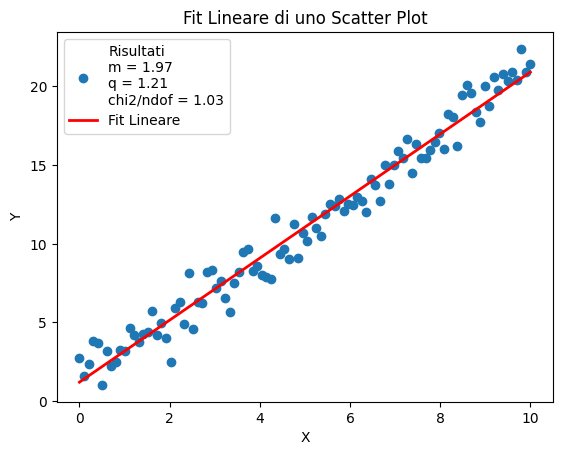

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generazione dei dati di esempio
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.randn(100)

# Definizione della funzione lineare
def linear(x, m, q):
    return m * x + q

# Fittaggio della funzione lineare ai dati dello scatter plot
p0 = [1, 1]  # Valori iniziali per i parametri m e q
params, _ = curve_fit(linear, x, y, p0=p0)

# Creazione del grafico
plt.scatter(x, y, label='Dati')
plt.plot(x, linear(x, *params), color='red', linewidth=2, label='Fit Lineare')

# Informazioni sui parametri e chi2/ndof
param_info = f"m = {params[0]:.2f}\nq = {params[1]:.2f}"
chi2_ndof = f"chi2/ndof = {np.sum((y - linear(x, *params))**2) / (len(y) - len(params)):.2f}"

# Aggiunta delle informazioni alla legenda
plt.legend([f'Risultati\n{param_info}\n{chi2_ndof}', 'Fit Lineare'])

# Personalizzazione del grafico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fit Lineare di uno Scatter Plot')

# Mostra il grafico
plt.show()
